In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/EV-Project/data/cleaned_ev_dataset.csv')
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge
0,-75.7475,45.39468,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False
1,-75.6823,45.43930,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False
2,-75.6782,45.08860,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False
3,-75.6793,45.42710,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False
4,-75.6893,45.40323,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False


Questions?

1 - When is peak energy demand?

2 - Which stations have the highest total demand?

3 - Are there daily/weekly/seasonal patterns in charging?

4 - Does session duration correlate with energy drawn?

5 - Which locations are high-demand hotspots?

6 - Which sessions are inefficient (long time, low kWh)?

7 - Are there usage patterns by province or city?

8 - What’s the energy usage per minute across sessions?

9 - Do overnight sessions consume more energy?

10 - How many users end charging early vs full?

11 - Are there usage anomalies (spikes/drops)?

12 - Are certain stations underutilized?

13 - Do stations exhibit consistent demand or volatility?

14 - Do charging behaviors differ by time of day?

15 - What percentage of total demand comes from top 10 stations?

16 - Do users tend to charge more on weekends or weekdays?

17 - Are there frequent short sessions (low kWh & time)?

18 - How many sessions were likely vehicle plug-in mistakes?

19 - What is the hourly demand per province?

20 - Are there duplicate or overlapping sessions?

In [3]:
df.columns

Index(['longitude', 'latitude', 'session_id', 'connect_start', 'connect_end',
       'charging_duration_minutes', 'province', 'owner', 'address',
       'station_id', 'end_reason', 'total_kwh',
       'is_overnight_or_extended_charge'],
      dtype='object')

<Axes: >

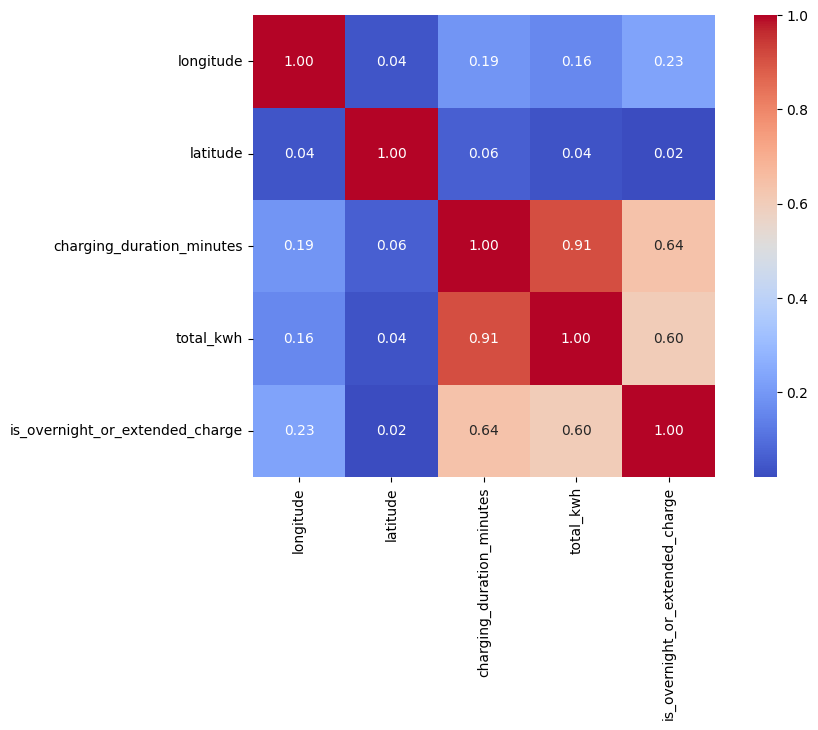

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(
    data=df.corr(numeric_only=True),
    annot = True,
    fmt='.2f',
    cmap="coolwarm", 
    square=True     
    )

In [5]:
overall_avg = df['total_kwh'].mean()
print(f"Overall average total_kwh per record: {overall_avg:.2f}")

Overall average total_kwh per record: 15.47


In [6]:
df.columns

Index(['longitude', 'latitude', 'session_id', 'connect_start', 'connect_end',
       'charging_duration_minutes', 'province', 'owner', 'address',
       'station_id', 'end_reason', 'total_kwh',
       'is_overnight_or_extended_charge'],
      dtype='object')

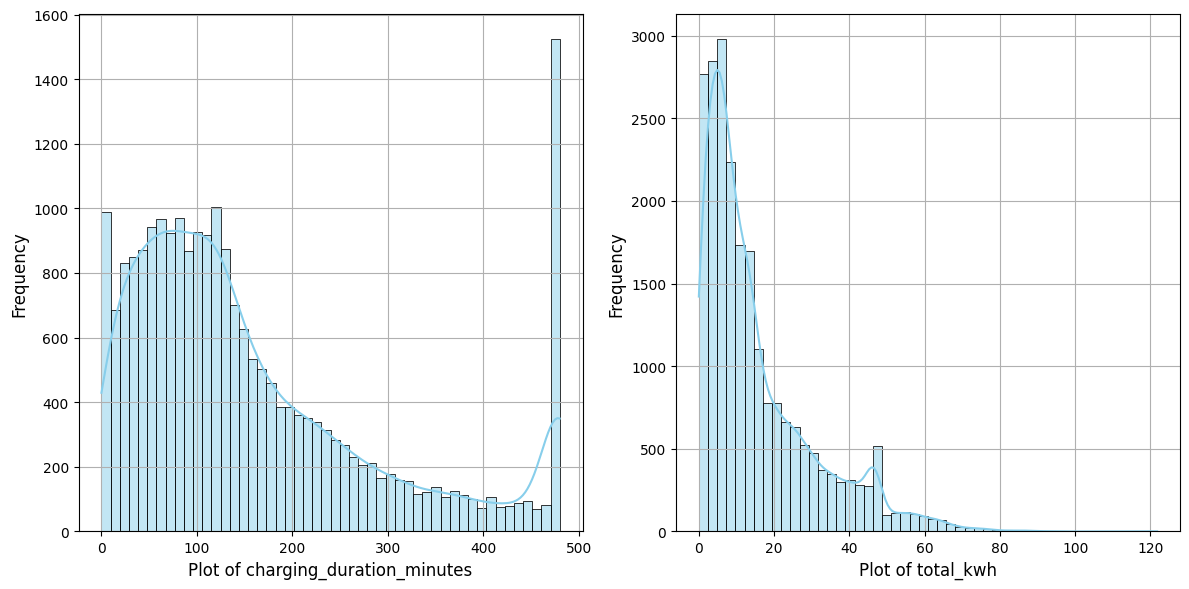

In [7]:
cols_to_plot = ['charging_duration_minutes', 'total_kwh']

fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(12,6))

for i, col in enumerate(cols_to_plot):
    sns.histplot(data=df, x=col, bins=50, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_xlabel(f'Plot of {col}', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

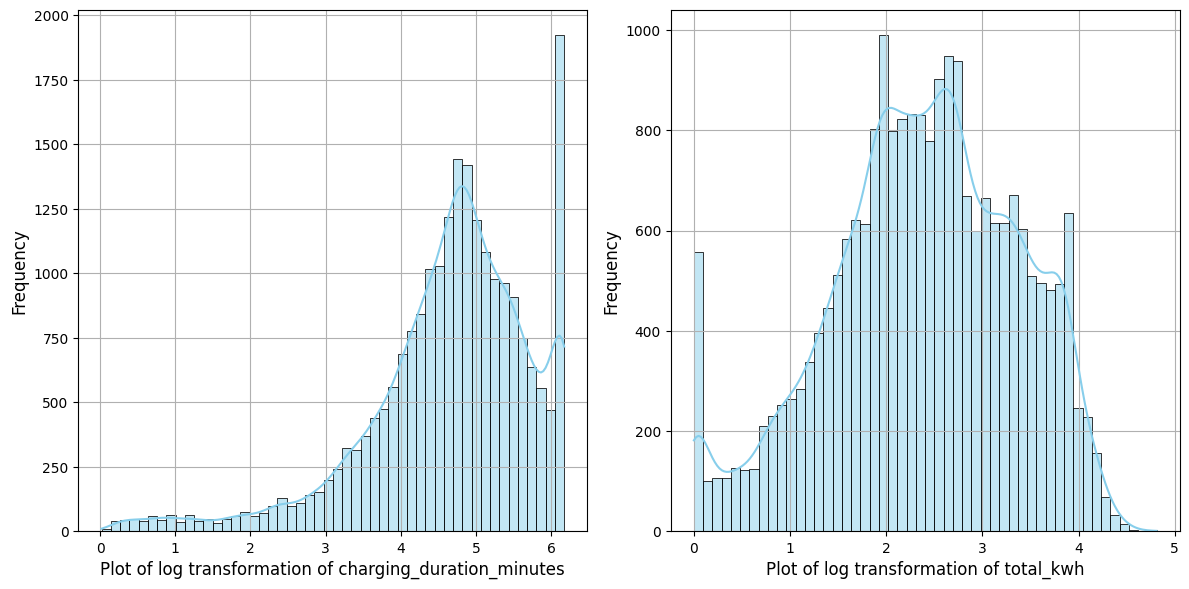

In [8]:
# Right Skewed -> Apply log transformation to normalise dataset column

cols_to_plot = ['charging_duration_minutes', 'total_kwh']

fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(12,6))

for i, col in enumerate(cols_to_plot):
    sns.histplot(np.log1p(df[col]), bins=50, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_xlabel(f'Plot of log transformation of {col}', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

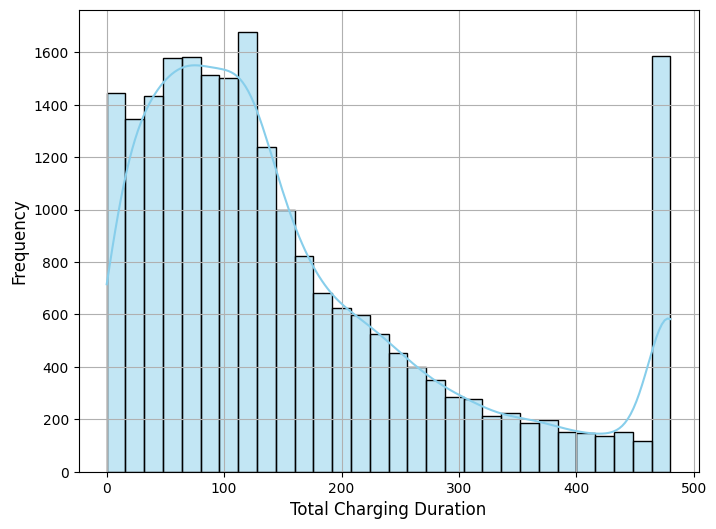

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data = df, x='charging_duration_minutes', bins=30, kde=True, color='skyblue')
plt.xlabel('Total Charging Duration', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

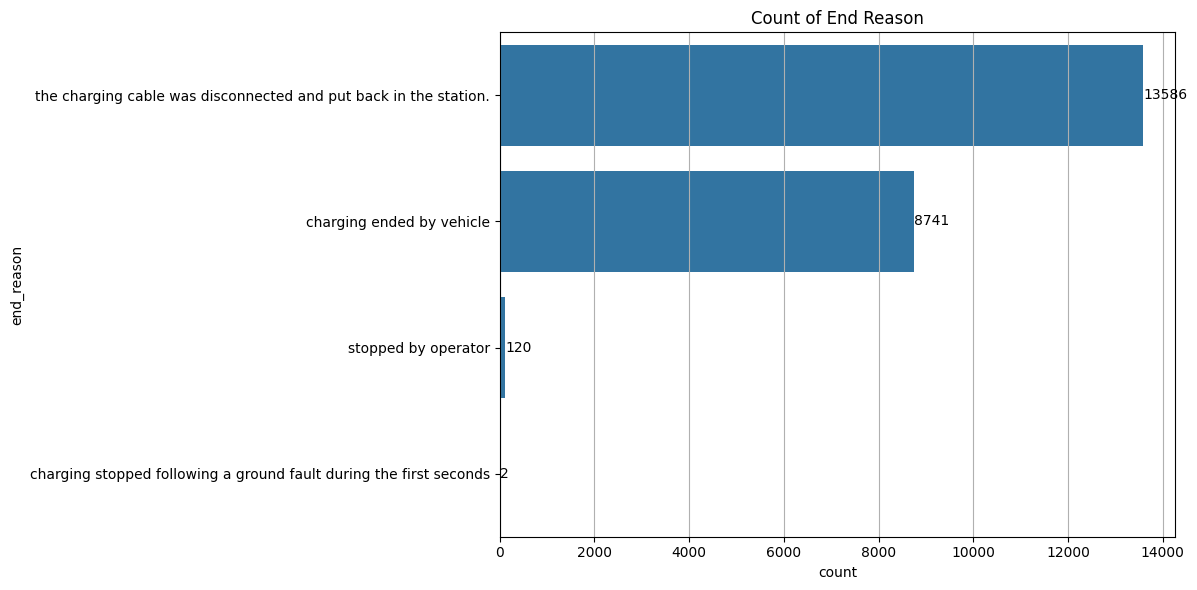

In [10]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='end_reason', order=df['end_reason'].value_counts().index)
plt.title('Count of End Reason')
plt.grid(True, axis='x')


for p in ax.patches:
    count = int(p.get_width()) 
    ax.text(count + 1,                 
            p.get_y() + p.get_height() / 2, 
            str(count),
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Number of charging stations are:  36


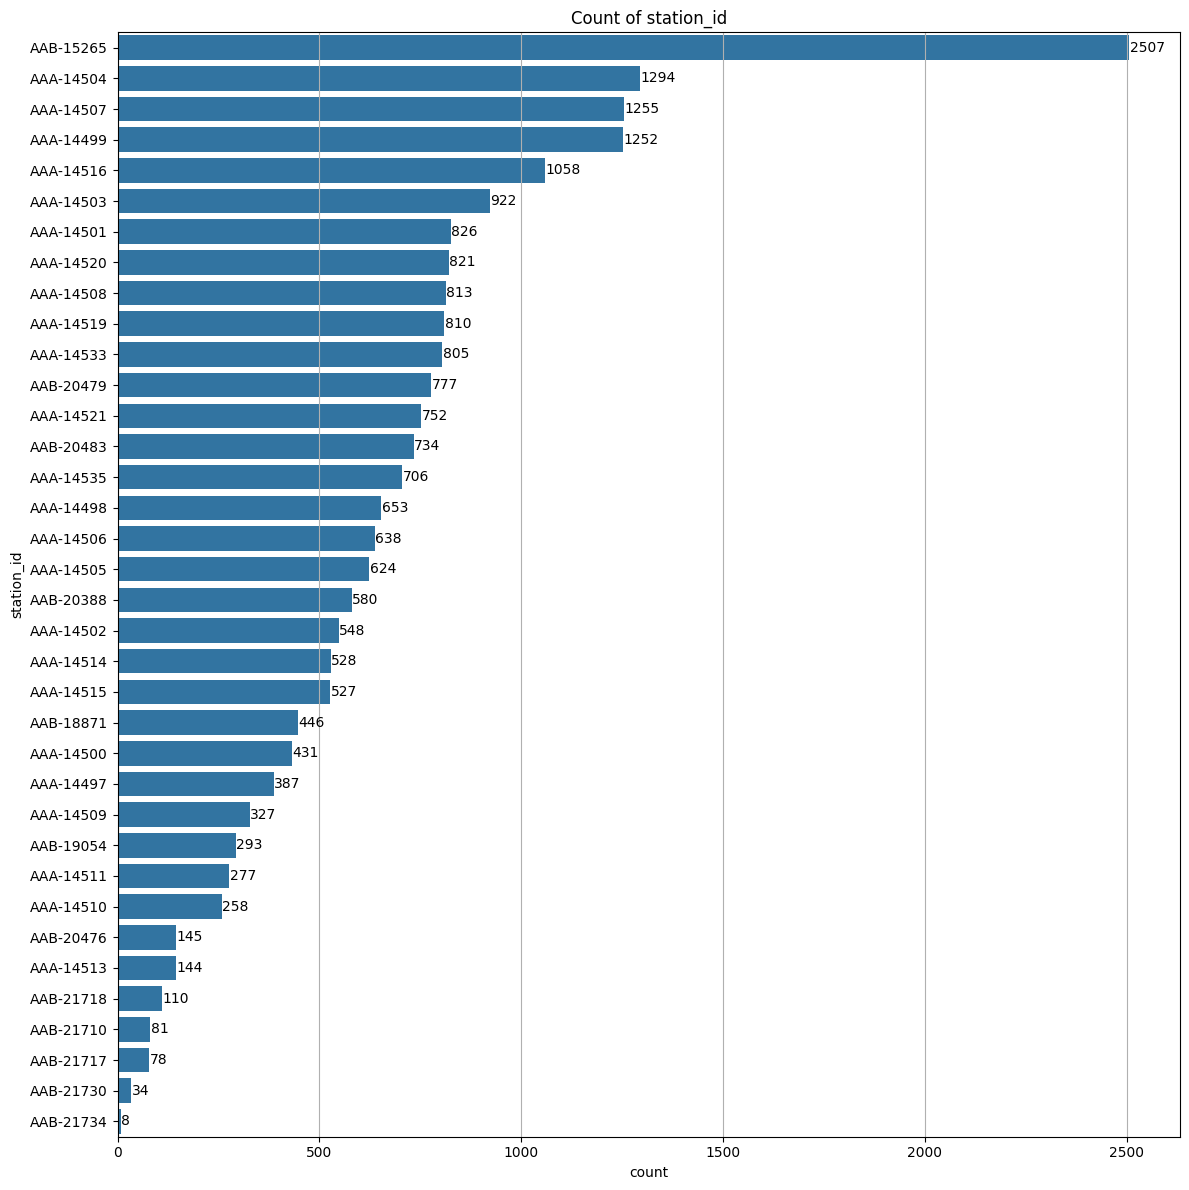

In [11]:
print("Number of charging stations are: ", df['station_id'].nunique())


plt.figure(figsize=(12, 12))
ax = sns.countplot(data=df, y='station_id', order=df['station_id'].value_counts().index)
plt.title('Count of station_id')
plt.grid(True, axis='x')


for p in ax.patches:
    count = int(p.get_width()) 
    ax.text(count + 1,                 
            p.get_y() + p.get_height() / 2, 
            str(count),
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Number of address are:  18


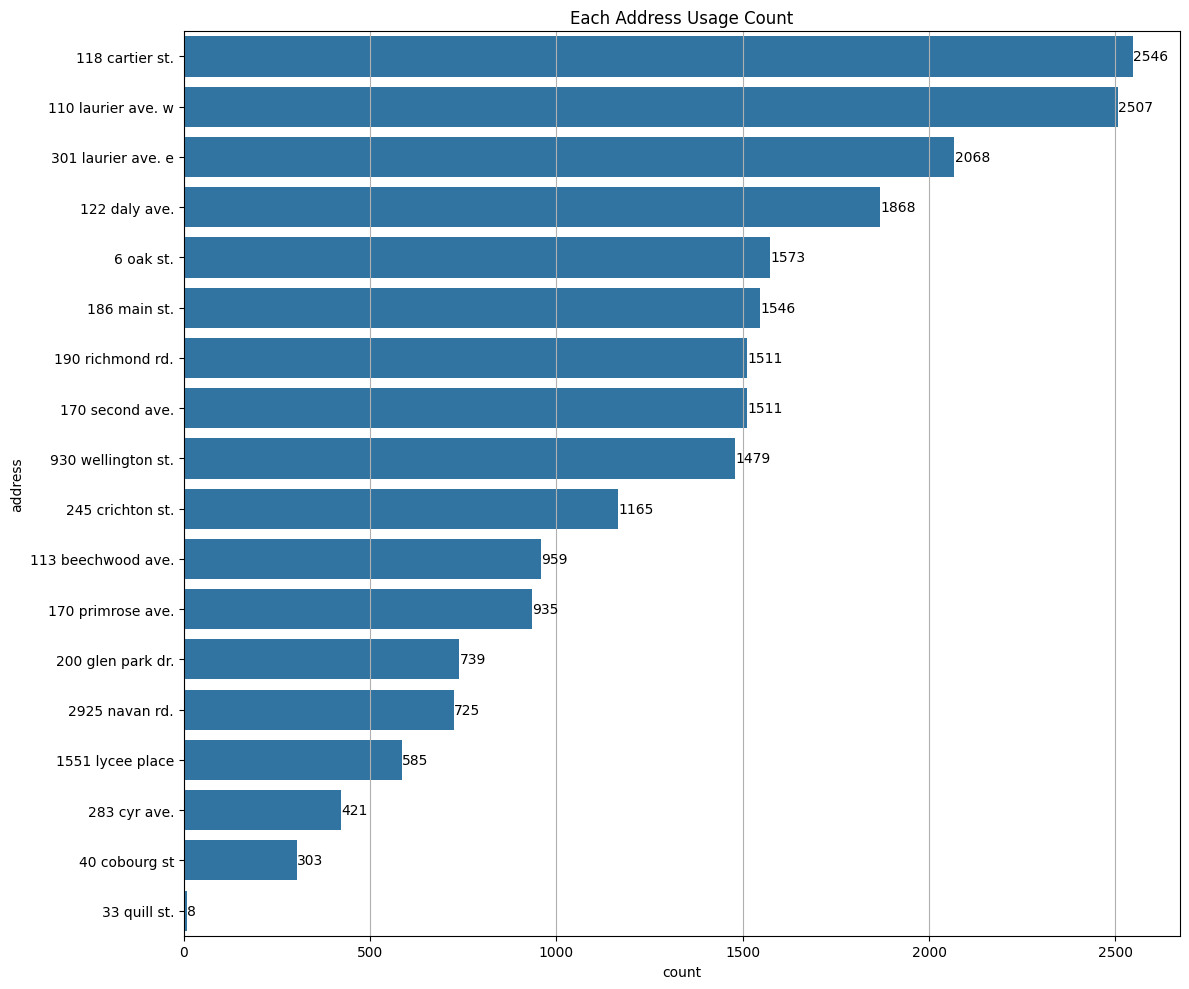

In [12]:
df['address'] = df['address'].replace("110 laurier ave w.", "110 laurier ave. w")

print("Number of address are: ", df['address'].nunique())

plt.figure(figsize=(12, 10))
ax = sns.countplot(data=df, y='address', order=df['address'].value_counts().index)
plt.title('Each Address Usage Count')
plt.grid(True, axis='x')


for p in ax.patches:
    count = int(p.get_width()) 
    ax.text(count + 1,                 
            p.get_y() + p.get_height() / 2, 
            str(count),
            ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()


There are a large number of unique station IDs but relatively few unique addresses. This suggests that multiple charging stations (station_id) may exist at the same physical location (address),possibly representing different charging ports or connectors at the same site. This could be useful for aggregating demand or analyzing station-level vs. site-level usage patterns.


THERE ARE 2 ENTRIES FOR "110 LAURIER AVE W" WITH JUST THE DIFFERENCE OF A DOT, DUPLICATE DATA. SO NEED TO FIX THAT FIRST. ONLY 1 ENTRY HAS DOT AFTER W IN THE Number of charging at each address BAR PLOT, SO FIX THAT. I have Fixed that before plotting this graph.

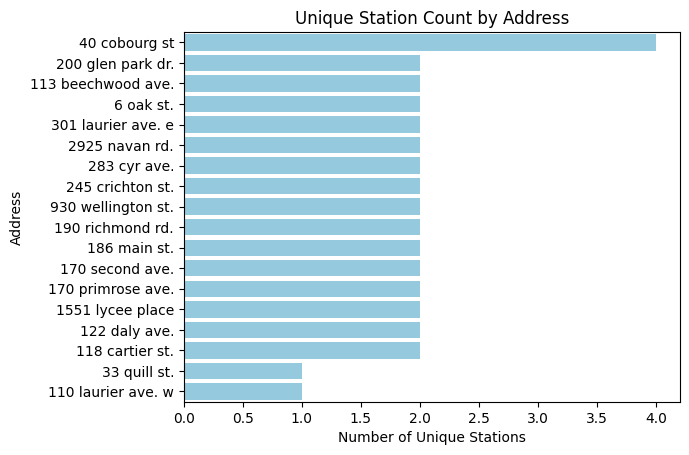

In [13]:
station_counts = df.groupby('address')['station_id'].nunique().sort_values(ascending=False)

sns.barplot(x=station_counts.values, y=station_counts.index, color='skyblue')

plt.xlabel('Number of Unique Stations')
plt.ylabel('Address')
plt.title('Unique Station Count by Address')
plt.show()

Which address is most used?

The Problem with 118 Carter Street:
This location is seriously understaffed for the demand it's seeing. With only 2 charging stations handling 2,546 charging sessions, that's about 1,273 uses per station. This is a classic case of high demand meeting limited supply. Customers are likely experiencing long wait times, which hurts their experience and could drive them to competitors. This location is practically screaming for more charging stations.

The Problem with 110 Laurier Ave W.
his location is seriously understaffed for the demand it's seeing. With only 1 charging stations handling 2,507 charging sessions. This is also classic case of high demand meeting limited supply, red flag. Customers are likely experiencing long wait times, which hurts their experience and could drive them to competitors. This location is practically screaming for more charging stations.

The Problem with 112 Daly Ave.
his location is seriously understaffed for the demand it's seeing. With only 2 charging stations handling 1868 charging sessions, , that's about 934 uses per station.. This is also classic case of high demand meeting limited supply, red flag. Customers are likely experiencing long wait times, which hurts their experience and could drive them to competitors. This location is practically screaming for more charging stations.

The Problem with 40 Cobourg Street:
This is the opposite scenario - we're over-invested here. With 4 stations only being used 303 times total, that's roughly 76 uses per station. This suggests the location either has poor visibility, limited foot traffic, or simply isn't convenient for most customers. Having 4 stations here is wasteful from both a cost and efficiency perspective.


What This Means for Business Strategy:
You're essentially leaving money on the table at Carter Street while burning money at Cobourg Street. The smart move would be to redistribute resources - add 2-3 more stations to Carter Street to capture that unmet demand and reduce wait times, while scaling back Cobourg Street to just 1-2 stations.

Which address has most energy demand (total kwh)?

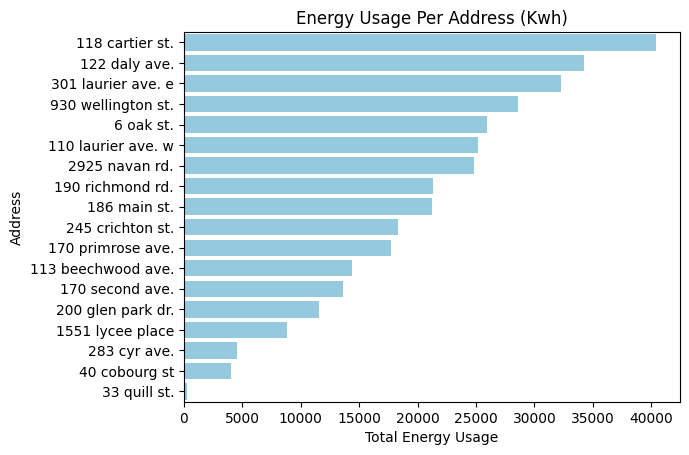

In [14]:
total_usage = df.groupby('address')['total_kwh'].sum().sort_values(ascending=False)

sns.barplot(x=total_usage.values, y=total_usage.index, color='skyblue')

plt.xlabel('Total Energy Usage')
plt.ylabel('Address')
plt.title('Energy Usage Per Address (Kwh)')
plt.show()


Double Confirmation of High Demand: 

When both the number of charging sessions AND the total energy consumption are highest at the same locations (118 Carter Street and 122 Daly Ave), this isn't just coincidence - it's solid evidence of genuine, sustained demand. These aren't just quick top-offs; people are doing serious charging at these locations.

Final Analysis:

One of the first things that jumps out is how badly some of the charging infrastructure is being used. Take 40 Cobourg Street — it has 4 stations (the most of any location!), but barely gets used — only 303 sessions and very little energy consumed. Now compare that to 118 Carter Street, which only has 2 stations, but handles a massive 2,546 sessions — that’s the highest usage in the whole dataset. Huge imbalance.

118 Carter Street and 110 Laurier Ave W are absolute workhorses. They don’t have a lot of infrastructure — just 2 stations each — but they’re dealing with over 2,500 sessions each. That’s 1,200+ charging sessions per station. Clearly, these locations are in high demand and are doing a lot with very little.

Then there’s 301 Laurier Ave E — it’s not as flashy, but still super impressive. It has just 2 stations but still pulls in 2,068 sessions and a lot of energy consumption. It feels like an untapped opportunity — if you added more capacity here, usage could grow even more.

On the flip side, some places have multiple stations but aren’t getting used much. For example, 200 Glen Park Dr has 2 stations but only gets 739 sessions. That’s low compared to the others — probably not the best spot, or maybe too much competition nearby.

The data shows a clear pattern: location trumps quantity. The top performers aren't successful because they have more stations - they're successful because they're in the right spots where people actually need to charge. This means your expansion strategy should focus on identifying what makes Carter Street and Laurier locations so attractive, then replicating those conditions rather than just adding more stations randomly.



In [15]:
df.columns

Index(['longitude', 'latitude', 'session_id', 'connect_start', 'connect_end',
       'charging_duration_minutes', 'province', 'owner', 'address',
       'station_id', 'end_reason', 'total_kwh',
       'is_overnight_or_extended_charge'],
      dtype='object')

Peak Hours of Charging Demand by Address or Station

In [16]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge
0,-75.7475,45.39468,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False
1,-75.6823,45.43930,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False
2,-75.6782,45.08860,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False
3,-75.6793,45.42710,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False
4,-75.6893,45.40323,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False


In [17]:
# Added start_hour column to identify peak demanding hours
df['start_hour'] = pd.to_datetime(df['connect_start']).dt.hour

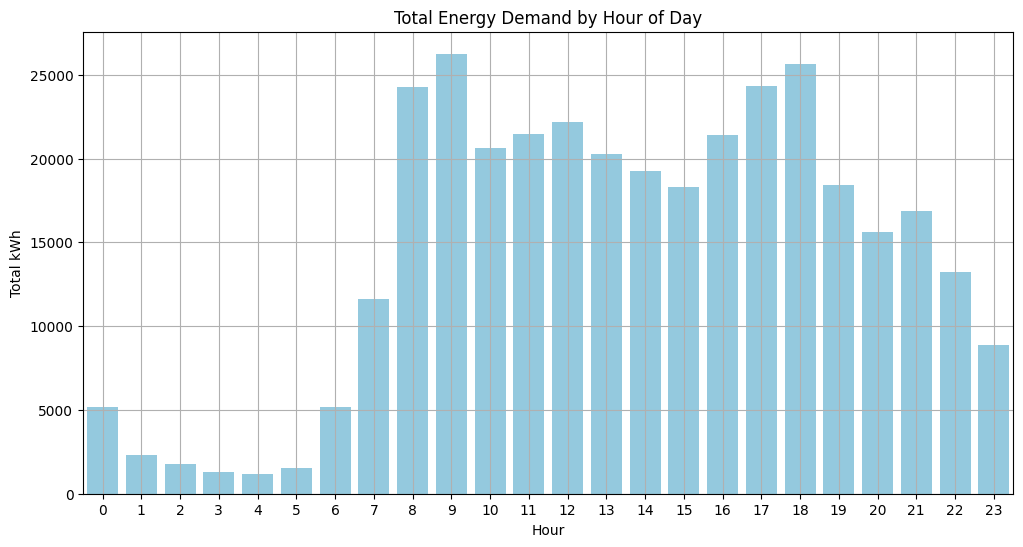

In [18]:
hourly_usage = (df.groupby('start_hour')['total_kwh'].sum().reset_index().sort_values(by='total_kwh', ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_usage, x='start_hour', y='total_kwh', color='skyblue')
plt.title("Total Energy Demand by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Total kWh")
plt.grid(True)
plt.show()


# Convert panda series in table by using reset_index() or use .plot

# hourly_usage = df.groupby('start_hour')['total_kwh'].sum()
# hourly_usage.plot(kind='bar', figsize=(12, 6), color='orange')
# plt.title("Total Energy Demand by Hour of Day")
# plt.xlabel("Hour")
# plt.ylabel("kWh")
# plt.grid(True)
# plt.show()

Peak hours are morning 8am - 9am : Before going to work people charge their vehicles (We see usage starts climbing around 6-7 AM and hits its absolute peak at 9 AM. That's classic commuter behavior - people are charging up before work or topping off on their way to the office.)


Peak hours are evening 17:00 & 18:00 : After coming from work (We get another big jump around 5-6 PM. Classic rush hour pattern. People are charging before work and after work.)

Usage doesn't just drop off after 6 PM. It stays pretty high until around 8-9 PM, then gradually declines. This suggests people are charging after dinner, maybe while running errands or before heading home for the night.

Hourly Usage of Top 5 Addresses or Locations Which Consume Highest Amount of Energy, Then we Will check peak hours.

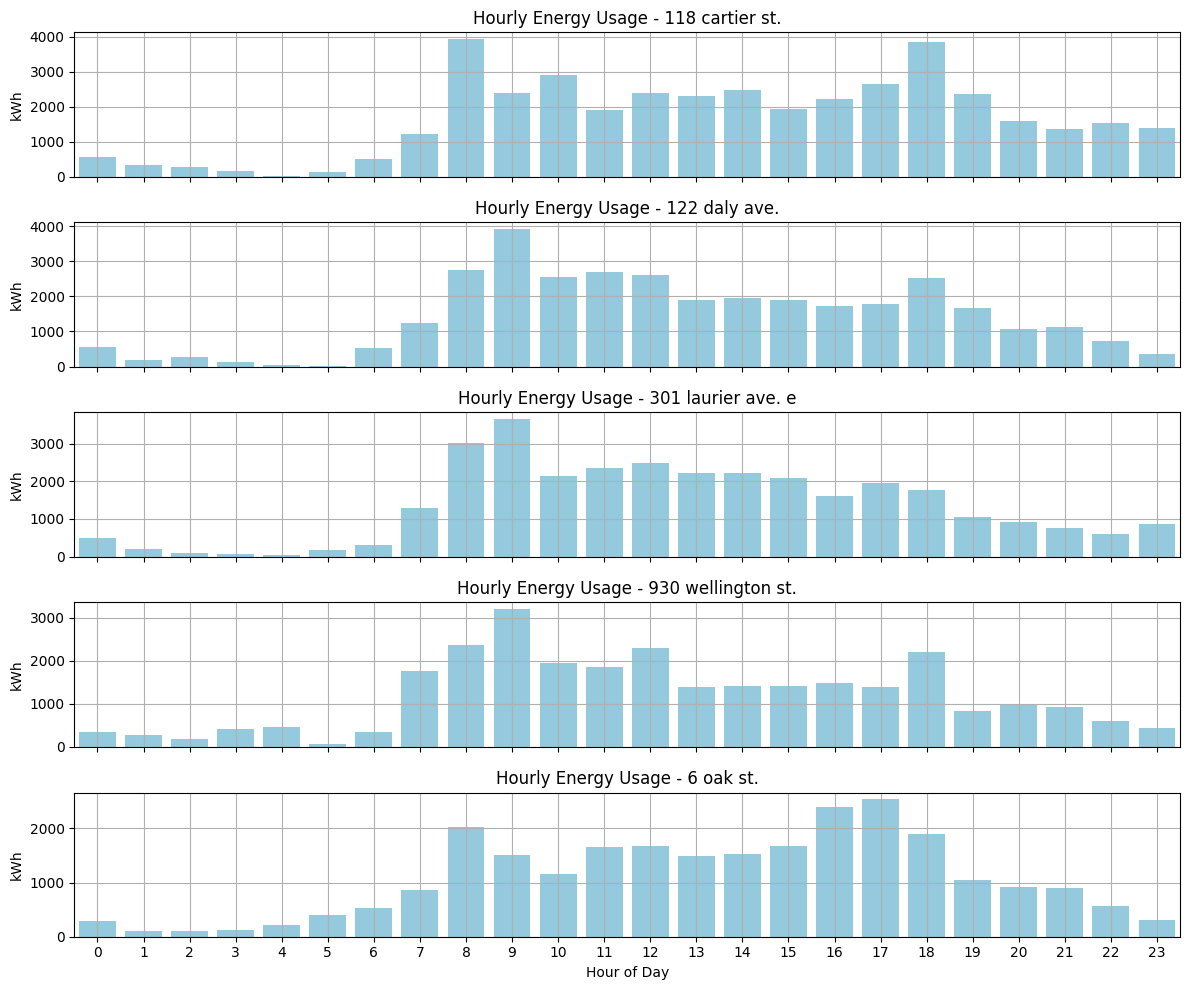

In [19]:
top5_addresses = total_usage.head(5).index.tolist()

fig,axes = plt.subplots(ncols=1, nrows=5, figsize=(12,10), sharex=True)

for i in range(5):
    address = top5_addresses[i]

    df_address = df[df['address'] == address]

    hourly_usage_address = df_address.groupby('start_hour')['total_kwh'].sum().reset_index()

    sns.barplot(data=hourly_usage_address, x='start_hour', y='total_kwh', ax=axes[i], color='skyblue')
    axes[i].set_title(f"Hourly Energy Usage - {address}")
    axes[i].set_ylabel("kWh")
    axes[i].grid(True)

plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()

Looking at all these hourly charts, they're basically showing the same pattern:

Morning peak around 8-9 AM - Every single one of these top locations has this. People charging before work.

Stays busy during the day - All of them maintain decent usage throughout business hours (roughly 10 AM to 5 PM).

Some evening activity - Most have another smaller bump around 5-6 PM, but not as big as the morning.

Dead at night - All of them drop to almost nothing overnight.

The main difference is just the scale. 118 Carter Street and 122 Daly Ave have the biggest spikes, but they're all following the same basic pattern.

So connecting this back to the earlier analysis: these high-usage, high-energy locations aren't successful because they serve different types of customers - they're successful because they're better positioned to capture the same customer behavior that happens everywhere. Morning commute charging, daytime business charging, some evening charging.



Demand by Weekday — When Do People Charge the Most Across the Week?

In [20]:
df['connect_start'] = pd.to_datetime(df['connect_start'], dayfirst=False)
df['weekday'] = df['connect_start'].dt.day_name()
print(df['weekday'].value_counts())

weekday
Saturday     3880
Friday       3459
Sunday       3332
Wednesday    3092
Thursday     3083
Tuesday      2944
Monday       2659
Name: count, dtype: int64


We extracted the weekday from the connect_start timestamps to analyze daily charging patterns. Although the datetime values appear to be in ISO format (YYYY-MM-DD HH:MM:SS), initially the weekday names were incorrect due to pandas misinterpreting the date format. Setting dayfirst=False explicitly ensured pandas reads the dates as month-first, which matches our data’s format. After this fix, the weekday names were correctly extracted (e.g., May 3, 2022 shows as Tuesday). This allowed us to accurately analyze charging demand by weekday.

I double checked on calender, in below table at index 22, the date is May 4, 2022 which is "Wednesday" so we are on right track now.

In [21]:
df.loc[df['weekday'] == 'Wednesday']

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday
22,-75.6903,45.42081,cf460af6-9afb-44c0-8231-e6cc15c59085,2022-05-04 10:51:37,2022-05-04 11:30:58,39.35,ON,City of Ottawa,110 laurier ave. w,AAB-15265,the charging cable was disconnected and put ba...,2.27261,False,10,Wednesday
23,-75.6864,45.41601,81c15ddd-befa-4f39-8e63-2ee370d2e369,2022-05-04 15:22:39,2022-05-04 15:22:55,0.27,ON,City of Ottawa,118 cartier st.,AAA-14499,the charging cable was disconnected and put ba...,0.00000,False,15,Wednesday
24,-75.7212,45.40702,cf9d6d28-e79c-4fe8-8f10-58ee2ac61880,2022-05-04 15:55:31,2022-05-04 16:36:44,41.22,ON,City of Ottawa,930 wellington st.,AAA-14501,the charging cable was disconnected and put ba...,4.85319,False,15,Wednesday
25,-75.7212,45.40702,d6719cee-7fca-49ce-a8eb-6f57f30a0c28,2022-05-04 17:11:01,2022-05-04 18:02:53,51.87,ON,City of Ottawa,930 wellington st.,AAA-14501,the charging cable was disconnected and put ba...,3.06735,False,17,Wednesday
26,-75.6893,45.40323,18ba0b9d-e583-49fd-902e-525c0cb25bbc,2022-05-04 18:10:53,2022-05-04 18:12:51,1.97,ON,City of Ottawa,170 second ave.,AAB-20483,charging ended by vehicle,0.00000,False,18,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22261,-75.7212,45.40702,1d7dfc09-3d9f-49c9-bef2-8790eb28ce35,2024-06-26 12:30:14,2024-06-26 13:48:47,78.55,ON,City of Ottawa,930 wellington st.,AAA-14501,the charging cable was disconnected and put ba...,8.89722,False,12,Wednesday
22262,-75.7136,45.41067,44964171-a24c-41d1-a8a4-77175dac4a7a,2024-06-26 09:14:51,2024-06-26 13:54:14,279.38,ON,City of Ottawa,170 primrose ave.,AAA-14502,charging ended by vehicle,7.64928,False,9,Wednesday
22263,-75.6782,45.08860,9cb44415-48be-4042-8398-faf1834acf51,2024-06-26 12:59:48,2024-06-26 13:57:24,57.60,ON,City of Ottawa,186 main st.,AAA-14503,the charging cable was disconnected and put ba...,3.38205,False,12,Wednesday
22264,-75.6864,45.41601,f2124e48-1129-4a7d-8797-5a598ad57036,2024-06-26 08:26:43,2024-06-26 14:24:19,357.60,ON,City of Ottawa,118 cartier st.,AAA-14499,the charging cable was disconnected and put ba...,42.74585,False,8,Wednesday


In [22]:
df.head()

# Initially, the day name at index 0 was showing as Thursday, which was incorrect since the calendar indicates it should be Sunday. This happened because the dates were not parsed correctly. After setting dayfirst=False while parsing, the dates and their corresponding day names aligned properly with the calendar. With this correction, we can now proceed confidently with our analysis.

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday
0,-75.7475,45.39468,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday
1,-75.6823,45.43930,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday
2,-75.6782,45.08860,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday
3,-75.6793,45.42710,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday
4,-75.6893,45.40323,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday


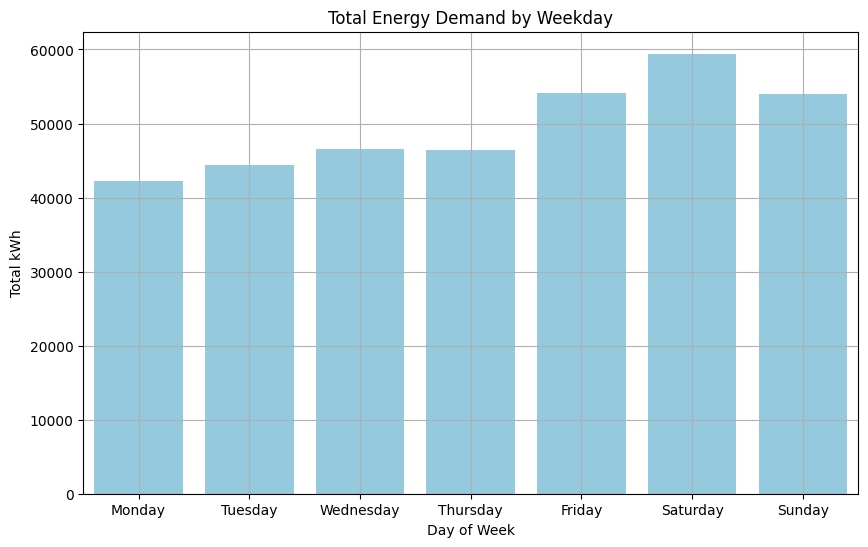

In [23]:
energy_usage_weekday = df.groupby('weekday')['total_kwh'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=energy_usage_weekday, x='weekday', y='total_kwh', color='skyblue')
plt.title("Total Energy Demand by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Total kWh")
plt.grid(True)
plt.show()

Weekdays: Pretty steady around 42-47k kWh. Normal business days.

Weekends: Big jump up to 54-59k kWh. People are home using more electricity.

Saturday: Highest day at 59k. Peak home energy use.

Friday: In between at 55k. Weekend starting early.

Basic pattern - more energy when people are home on weekends, less during the work week.

In [24]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday
0,-75.7475,45.39468,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday
1,-75.6823,45.43930,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday
2,-75.6782,45.08860,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday
3,-75.6793,45.42710,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday
4,-75.6893,45.40323,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday


Hourly Demand Patterns by Weekday

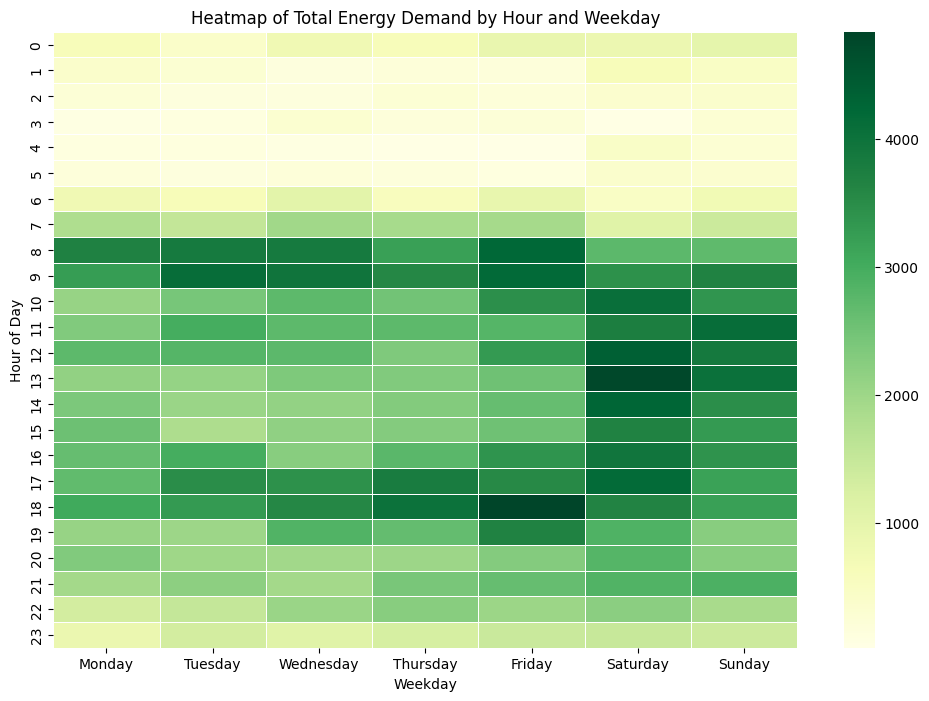

In [25]:
# Group by weekday and hour, then sum total kWh
hourly_weekday_usage = df.groupby(['start_hour','weekday'])['total_kwh'].sum().reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_weekday_usage['weekday'] = pd.Categorical(hourly_weekday_usage['weekday'], categories=weekday_order, ordered=True)

# Ai Helped Me Do This Correction ,Earlier Heatmap Was All Clustered. New Learning To Pivot The Table
heatmap_data = hourly_weekday_usage.pivot(index='start_hour', columns='weekday', values='total_kwh')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGn', linewidths=0.5)

plt.title('Heatmap of Total Energy Demand by Hour and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour of Day')
plt.show()


Ai Helped Me Do This Correction ,Earlier Heatmap Was All Clustered. New Learning

heatmap_data = hourly_weekday_usage.pivot(index='start_hour', columns='weekday', values='total_kwh')

Peak Hours: 8-9 AM and 6-7 PM are the darkest (highest demand) across most days.

Weekend Differences: Saturday and Sunday show more consistent demand throughout the day - people are home using energy all day rather than just morning/evening spikes.

Night Hours: Midnight to 6 AM are consistently light (low demand) across all days.

Weekday Pattern: Monday-Thursday show similar patterns with clear peaks and color patterns.

Mid-day: Weekdays have lower demand 10 AM-5 PM (people at work), but weekends stay elevated during these hours.

Basically confirms what the first chart showed - weekends have higher overall demand, but this shows it's because weekend demand stays high all day instead of just having morning/evening peaks.

In [26]:
hourly_weekday_usage

,start_hour,weekday,total_kwh
0,0,Friday,911.13114
1,0,Monday,615.44831
2,0,Saturday,857.11771
3,0,Sunday,1002.43909
4,0,Thursday,623.97758
...,...,...,...
163,23,Saturday,1476.44152
164,23,Sunday,1410.44546
165,23,Thursday,1274.46314
166,23,Tuesday,1316.43724


In [27]:
# After Pivoting
heatmap_data

weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
start_hour,,,,,,,
0,615.44831,405.47855,768.13482,623.97758,911.13114,857.11771,1002.43909
1,388.72794,299.44861,149.38300,210.32642,191.22581,615.55870,472.54812
2,235.59879,152.41840,148.67879,266.60199,205.95885,363.40048,375.44541
3,77.05827,117.41535,309.78413,192.92934,221.30380,61.48889,288.33587
4,112.95598,121.51823,100.53098,59.74388,26.07974,446.43154,289.06152
5,181.65906,140.66803,213.10716,168.24353,117.11851,372.21787,329.77204
6,773.88953,633.80212,1030.65120,563.78206,943.93842,465.80851,753.57333
7,1795.36856,1543.66222,1966.85869,1889.42704,1919.95285,1090.36203,1430.87066
8,3697.52152,3860.14070,3852.54677,3192.97253,4222.67104,2740.99711,2707.02361


Comparison on Demand for Daytime/Overnight Charging by Location.

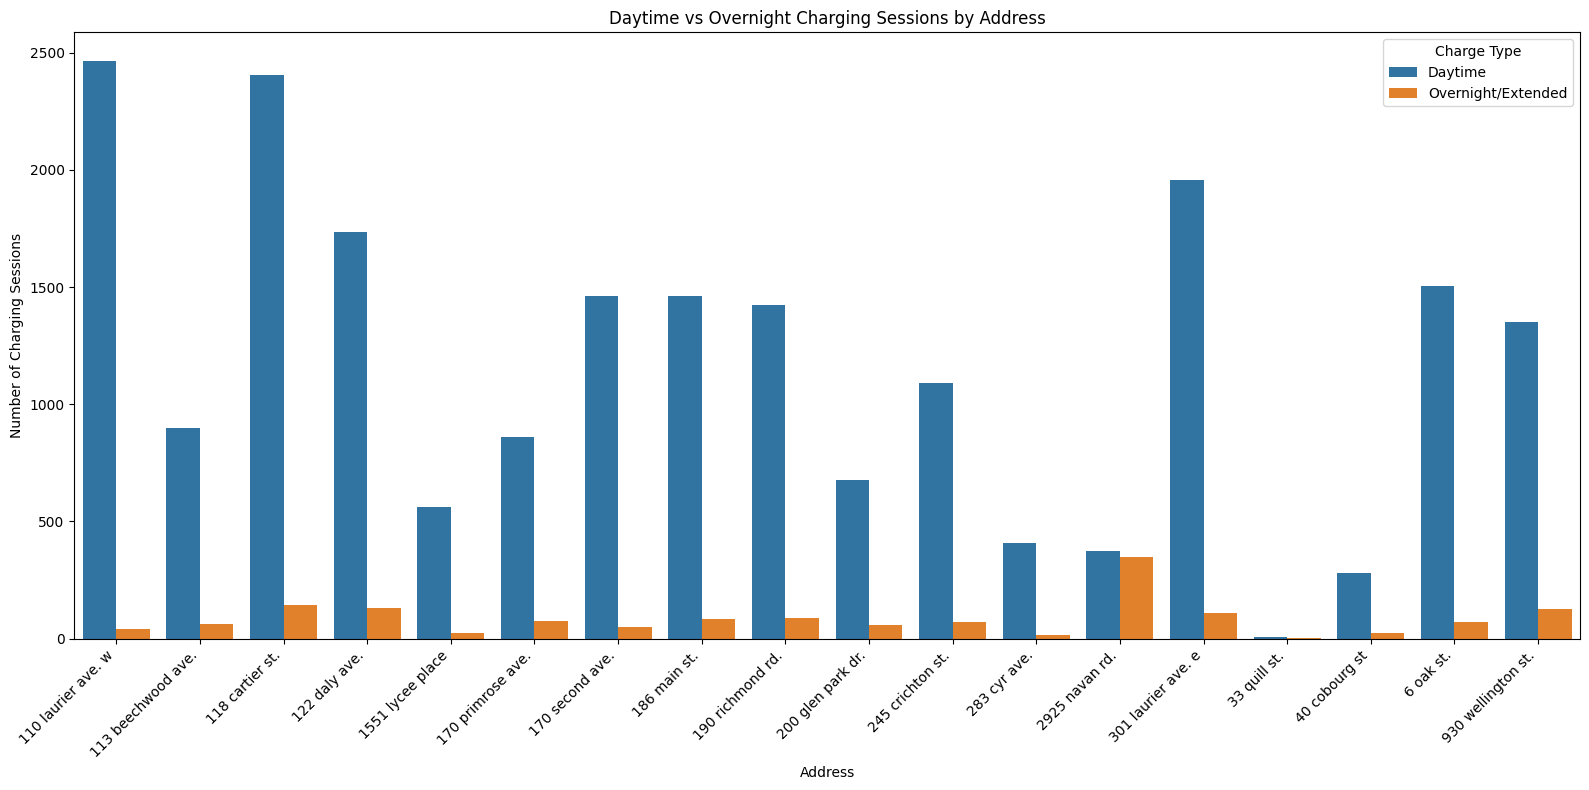

In [28]:
address_charge_counts = df.groupby(['address','is_overnight_or_extended_charge'])['session_id'].count().reset_index()

address_charge_counts.rename(columns={'session_id': 'session_count'}, inplace=True)

plt.figure(figsize=(16, 8))

address_charge_counts['charge_type'] = address_charge_counts['is_overnight_or_extended_charge'].map({
    True : 'Overnight/Extended',
    False : 'Daytime'
})


sns.barplot(data=address_charge_counts, x='address', y='session_count', hue='charge_type')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Address')
plt.ylabel('Number of Charging Sessions')
plt.title('Daytime vs Overnight Charging Sessions by Address')
plt.legend(title='Charge Type')
plt.tight_layout()
plt.show()

Every location has more demand for daytime charging but, 2925 navan rd. has almost equal demand for daytime & overnight charging and also the maximum demand for overnight charging.

In [29]:

overnight_df = address_charge_counts[address_charge_counts['is_overnight_or_extended_charge'] == True]
top_overnight_address = overnight_df.loc[overnight_df['session_count'].idxmax()]
top_overnight_address

address                                2925 navan rd.
is_overnight_or_extended_charge                  True
session_count                                     349
charge_type                        Overnight/Extended
Name: 25, dtype: object

In [30]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday
0,-75.7475,45.39468,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday
1,-75.6823,45.43930,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday
2,-75.6782,45.08860,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday
3,-75.6793,45.42710,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday
4,-75.6893,45.40323,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday


In [31]:
# import pandas as pd
# from datetime import datetime
# from meteostat import Point, Daily
# from tqdm import tqdm


# df['date'] = df['connect_start'].dt.date


# df['lat_rounded'] = df['latitude'].round(2)
# df['lon_rounded'] = df['longitude'].round(2)


# unique_combos = df[['date', 'lat_rounded', 'lon_rounded']].drop_duplicates().reset_index(drop=True)


# tqdm.pandas()


# def get_simple_weather(row):

#     location = Point(row['lat_rounded'], row['lon_rounded'])

    
#     date = datetime.combine(row['date'], datetime.min.time())

   
#     weather = Daily(location, date, date).fetch()


#     if weather.empty:
#         return 'unknown'


#     rain = weather.iloc[0]['prcp']
#     snow = weather.iloc[0]['snow']


#     if pd.isna(rain):
#         rain = 0
#     if pd.isna(snow):
#         snow = 0


#     if snow > 0.5:
#         return 'snowy'
#     elif rain > 2.0:
#         return 'rainy'
#     elif rain > 0:
#         return 'light rain'
#     else:
#         return 'sunny'


# unique_combos['weather_on_day'] = unique_combos.progress_apply(get_simple_weather, axis=1)


# df = df.merge(unique_combos, on=['date', 'lat_rounded', 'lon_rounded'], how='left')


In [32]:
# import os
# from datetime import datetime
# from meteostat import Point, Daily
# from tqdm import tqdm

# # Enable tqdm progress bar for pandas
# tqdm.pandas()

# # Assuming df is your main DataFrame and has 'connect_start', 'latitude', 'longitude' columns
# df['date_of_connection_started'] = df['connect_start'].dt.date
# df['latitude'] = df['latitude'].round(2)
# df['longitude'] = df['longitude'].round(2)

# unique_dates_locations = df[['date_of_connection_started', 'latitude', 'longitude']].drop_duplicates().reset_index(drop=True)

# CACHE_FILE = 'weather_data.csv'

# def get_weather_data(row):
#     location = Point(row['latitude'], row['longitude'])
#     day = datetime.combine(row['date_of_connection_started'], datetime.min.time())
#     weather = Daily(location, day, day).fetch()

#     if weather.empty:
#         return 'unknown'
    
#     rain = weather.iloc[0]['prcp']
#     snow = weather.iloc[0]['snow']

#     if pd.isna(rain):
#         rain = 0
#     if pd.isna(snow):
#         snow = 0
    
#     if snow > 0.5:
#         return 'snowy'
#     elif rain > 2.0:
#         return 'rainy'
#     elif rain > 0:
#         return 'light rain'
#     else:
#         return 'sunny'

# if os.path.exists(CACHE_FILE):
#     unique_dates_locations = pd.read_csv(CACHE_FILE, parse_dates=['date_of_connection_started'])
#     unique_dates_locations['date_of_connection_started'] = unique_dates_locations['date_of_connection_started'].dt.date
#     unique_dates_locations['latitude'] = unique_dates_locations['latitude'].round(2).astype(float)
#     unique_dates_locations['longitude'] = unique_dates_locations['longitude'].round(2).astype(float)
# else:
#     unique_dates_locations['weather_on_day'] = unique_dates_locations.progress_apply(get_weather_data, axis=1)
#     unique_dates_locations.to_csv(CACHE_FILE, index=False)


# df = df.merge(unique_dates_locations, on=['date_of_connection_started', 'latitude', 'longitude'], how='left')


In [33]:
import os
from datetime import datetime
from meteostat import Point, Daily
from tqdm import tqdm
import pandas as pd

# Enable tqdm progress bar for pandas
tqdm.pandas()

# Assuming df is your main DataFrame and has 'connect_start', 'latitude', 'longitude' columns
df['date_of_connection_started'] = df['connect_start'].dt.date
df['latitude'] = df['latitude'].round(2)
df['longitude'] = df['longitude'].round(2)

unique_dates_locations = df[['date_of_connection_started', 'latitude', 'longitude']].drop_duplicates().reset_index(drop=True)

CACHE_FILE = 'weather_data.csv'

def get_weather_data(row):
    location = Point(row['latitude'], row['longitude'])
    day = datetime.combine(row['date_of_connection_started'], datetime.min.time())
    weather = Daily(location, day, day).fetch()

    if weather.empty:
        return pd.Series({'weather_on_day': 'unknown', 'temperature_on_day': None})

    rain = weather.iloc[0]['prcp']
    snow = weather.iloc[0]['snow']
    temp = weather.iloc[0]['tavg']  # average daily temperature in °C

    # Handle NaNs
    rain = 0 if pd.isna(rain) else rain
    snow = 0 if pd.isna(snow) else snow
    temp = None if pd.isna(temp) else temp

    # Classify weather
    if snow > 0.5:
        weather_label = 'snowy'
    elif rain > 2.0:
        weather_label = 'rainy'
    elif rain > 0:
        weather_label = 'light rain'
    else:
        weather_label = 'sunny'

    return pd.Series({'weather_on_day': weather_label, 'temperature_on_day': temp})

if os.path.exists(CACHE_FILE):
    unique_dates_locations = pd.read_csv(CACHE_FILE, parse_dates=['date_of_connection_started'])
    unique_dates_locations['date_of_connection_started'] = unique_dates_locations['date_of_connection_started'].dt.date
    unique_dates_locations['latitude'] = unique_dates_locations['latitude'].round(2).astype(float)
    unique_dates_locations['longitude'] = unique_dates_locations['longitude'].round(2).astype(float)
else:
    weather_data = unique_dates_locations.progress_apply(get_weather_data, axis=1)
    unique_dates_locations = pd.concat([unique_dates_locations, weather_data], axis=1)
    unique_dates_locations.to_csv(CACHE_FILE, index=False)

# Merge with main DataFrame
df = df.merge(unique_dates_locations, on=['date_of_connection_started', 'latitude', 'longitude'], how='left')


In [34]:
df['weather_on_day'].value_counts()

weather_on_day
sunny         10068
snowy          5305
rainy          3976
light rain     3100
Name: count, dtype: int64

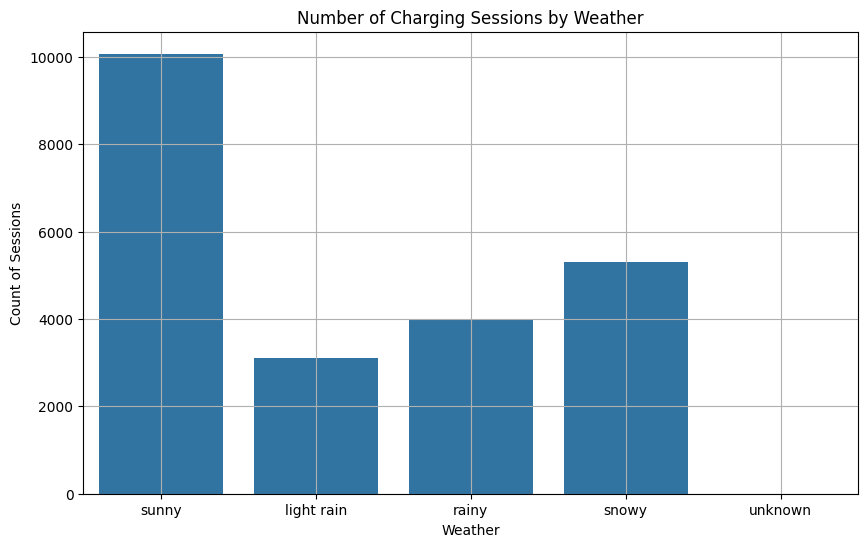

In [35]:
weather_order = ['sunny', 'light rain', 'rainy', 'snowy', 'unknown']

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='weather_on_day', order=weather_order)
plt.title('Number of Charging Sessions by Weather')
plt.xlabel('Weather')
plt.ylabel('Count of Sessions')
plt.grid()
plt.show()

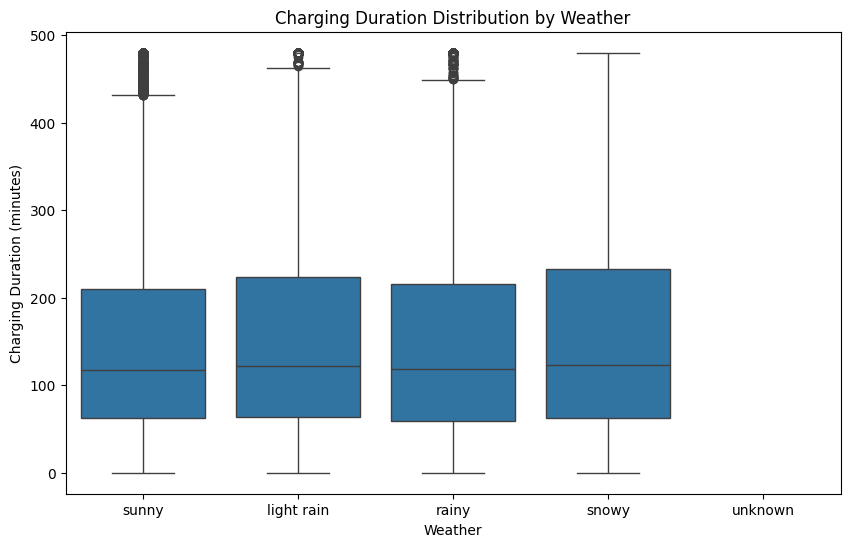

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='weather_on_day', y='charging_duration_minutes', order=weather_order)
plt.title('Charging Duration Distribution by Weather')
plt.xlabel('Weather')
plt.ylabel('Charging Duration (minutes)')
plt.show()

In [37]:
df.columns

Index(['longitude', 'latitude', 'session_id', 'connect_start', 'connect_end',
       'charging_duration_minutes', 'province', 'owner', 'address',
       'station_id', 'end_reason', 'total_kwh',
       'is_overnight_or_extended_charge', 'start_hour', 'weekday',
       'date_of_connection_started', 'weather_on_day', 'temperature_on_day'],
      dtype='object')

Bivariate Analysis

1 - Charging Duration vs Total kWh

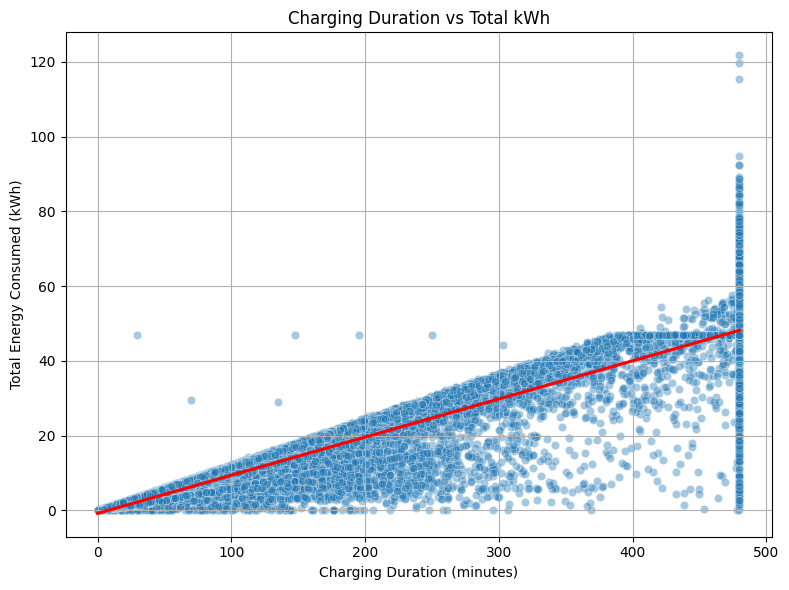

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='charging_duration_minutes', y='total_kwh', alpha=0.4)
sns.regplot(data=df, x='charging_duration_minutes', y='total_kwh', scatter=False, color='red')
plt.title("Charging Duration vs Total kWh")
plt.xlabel("Charging Duration (minutes)")
plt.ylabel("Total Energy Consumed (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

# With only regplot since the graph was getting too dense therefore I was unable to look at the regression line. Hence I plotted 2 graphs so that regression line can be plotted with a different colour to clearly identify the trend. 

Most people charge for short times (under 2 hours) and get small amounts of energy

A few people charge for very long times (6+ hours) and get lots of energy

There's a clear upward trend - longer charging = more energy (makes sense)

Start Hour V/s Total Energy - To show how energy demand varies by time of day. Predict spikes, Optimise grid load.


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



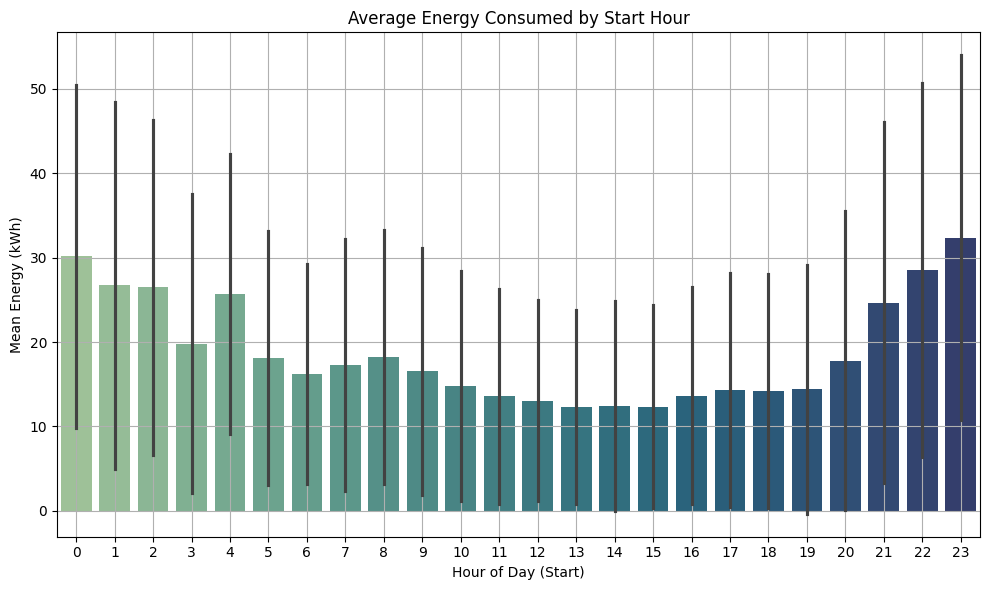

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='start_hour', y='total_kwh', errorbar='sd', palette='crest')
plt.title("Average Energy Consumed by Start Hour")
plt.xlabel("Hour of Day (Start)")
plt.ylabel("Mean Energy (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

Early Morning Peak (Midnight – 4 AM): These hours show the highest average energy consumption—around 25 to 30 kWh.This likely reflects overnight charging at homes or fleet depots, where vehicles are left to charge for longer periods.

Evening Peak (9 PM – 11 PM): There is a second surge in energy consumption in the late evening—around 25 to 32 kWh. This may correspond to users returning from work or trips and plugging in their vehicles.

Midday Low (10 AM – 7 PM): The lowest average energy usage happens during the daytime, between 10 AM and 7 PM, where values drop to just 12 to 15 kWh. During these hours, vehicles are likely in use, and if any charging happens, it's often short top-ups, such as at shopping malls or offices.

High Variability in Certain Hours: The black error bars show how much the energy consumption varies in each hour. Variability is highest during the early morning and late night hours, suggesting:

Some users fully charge their vehicles (high kWh)

Others only partially charge (low kWh)

Inconsistent user behavior during these hours

Analysis of Total Kwh V/s Weather

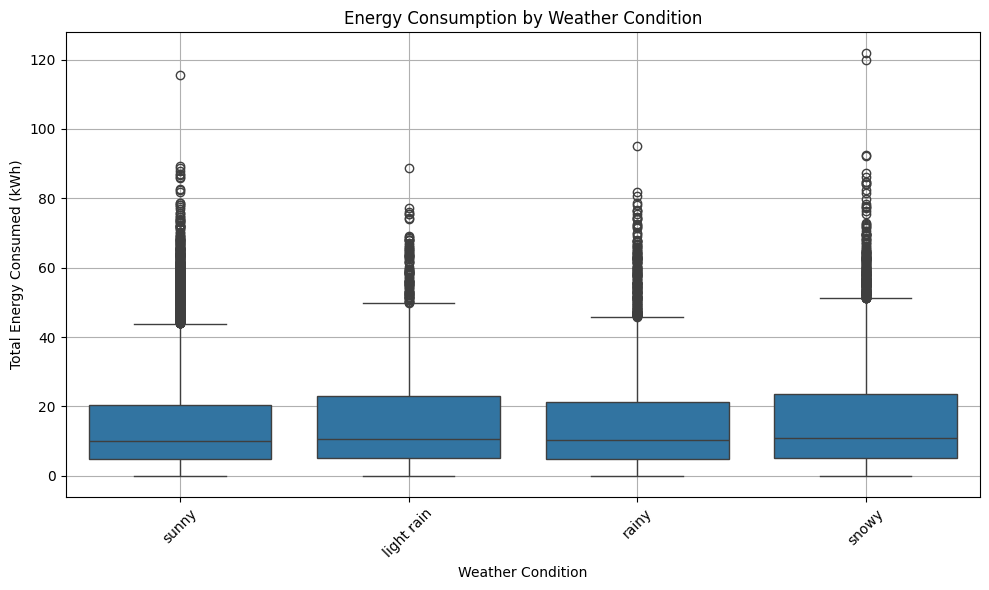

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='weather_on_day', y='total_kwh')
plt.title("Energy Consumption by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Total Energy Consumed (kWh)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

1: All weather types (sunny, light rain, rainy, snowy) have a median around 10–13 kWh.

2: Median and box height for snowy and light rain days are slightly higher. This may suggest longer charging sessions during cold or wet weather, possibly due to users "topping up more" when uncertain about driving conditions.

3: Snowy days seem to have a slightly higher upper whisker, indicating some people charge much more on snowy days.

4: Each weather condition has many high outliers (above 60–80 kWh). These are likely fleet vehicles or very long charging sessions.

Hence, Weather has only a moderate impact on average energy use.



In [41]:
df.columns

Index(['longitude', 'latitude', 'session_id', 'connect_start', 'connect_end',
       'charging_duration_minutes', 'province', 'owner', 'address',
       'station_id', 'end_reason', 'total_kwh',
       'is_overnight_or_extended_charge', 'start_hour', 'weekday',
       'date_of_connection_started', 'weather_on_day', 'temperature_on_day'],
      dtype='object')

In [42]:
df.head()

,longitude,latitude,session_id,connect_start,connect_end,charging_duration_minutes,province,owner,address,station_id,end_reason,total_kwh,is_overnight_or_extended_charge,start_hour,weekday,date_of_connection_started,weather_on_day,temperature_on_day
0,-75.75,45.39,ce499016-c0fe-4b76-9224-e8e9e8b1caa3,2022-05-01 11:36:44,2022-05-01 12:10:32,33.80,ON,City of Ottawa,190 richmond rd.,AAA-14533,charging ended by vehicle,4.06440,False,11,Sunday,2022-05-01,sunny,10.7
1,-75.68,45.44,daeaa8b8-2528-4b2a-a1ea-4aab820f188f,2022-05-01 12:07:03,2022-05-01 12:57:10,50.12,ON,City of Ottawa,245 crichton st.,AAA-14506,the charging cable was disconnected and put ba...,2.92454,False,12,Sunday,2022-05-01,sunny,10.7
2,-75.68,45.09,5e4d5163-2c67-4049-ac1d-41193e6064d9,2022-05-01 11:43:33,2022-05-01 14:40:34,177.02,ON,City of Ottawa,186 main st.,AAA-14503,charging ended by vehicle,20.59820,False,11,Sunday,2022-05-01,sunny,9.5
3,-75.68,45.43,c83802a2-1f6d-4c24-bba2-5bff14371aec,2022-05-01 13:21:37,2022-05-01 14:57:49,96.20,ON,City of Ottawa,301 laurier ave. e,AAA-14508,the charging cable was disconnected and put ba...,11.52725,False,13,Sunday,2022-05-01,sunny,10.7
4,-75.69,45.40,24715a5e-ccee-420f-ac17-0414a5ec14aa,2022-05-01 15:00:19,2022-05-01 15:35:18,34.98,ON,City of Ottawa,170 second ave.,AAB-20483,the charging cable was disconnected and put ba...,3.17881,False,15,Sunday,2022-05-01,sunny,10.7


Now let's do some analysis with average temperatures on the days of charging, it's impact on total_kwh.

In [43]:
missing_temp = df['temperature_on_day'].isna().sum()
print(f"Missing values in temperature_on_day: {missing_temp}")

Missing values in temperature_on_day: 0


In [44]:
df['temperature_on_day'].describe()

count    22449.000000
mean         8.531690
std         10.363909
min        -26.100000
25%          0.400000
50%          9.600000
75%         17.500000
max         27.700000
Name: temperature_on_day, dtype: float64

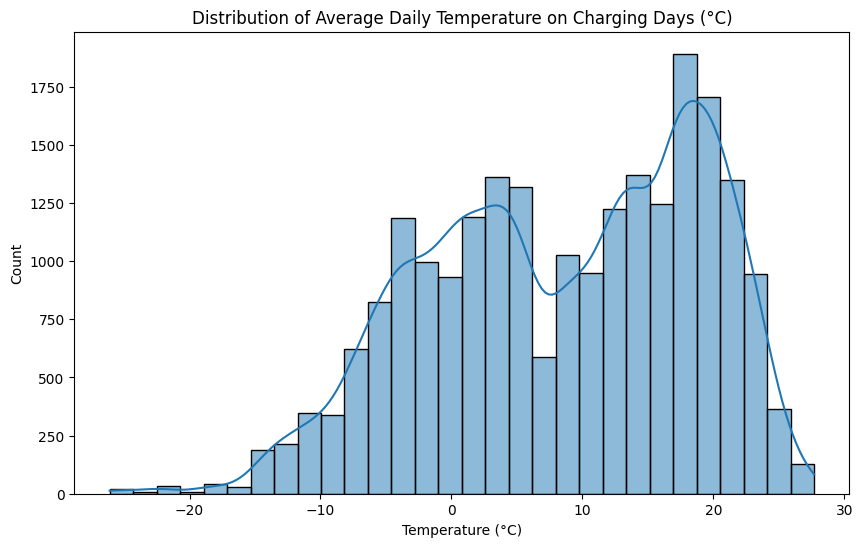

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(df['temperature_on_day'], bins=30, kde=True)
plt.title('Distribution of Average Daily Temperature on Charging Days (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.show()

There’s a lot of charging happening when it’s near 0 and above -10. This makes sense because batteries don’t work as efficiently when it’s cold — they lose range, and the heater inside the car uses extra power. So, drivers need to recharge more frequently.

The summer peak suggests people charge more during warm days too — maybe because using air conditioning drains the battery or people just drive more when the weather is nice (15 - 20).

Notice that charging dips in moderate temperatures — that’s probably when batteries work best and drivers don’t need to charge as often.

Temperature is a crucial element that influences the charging performance of an EV.

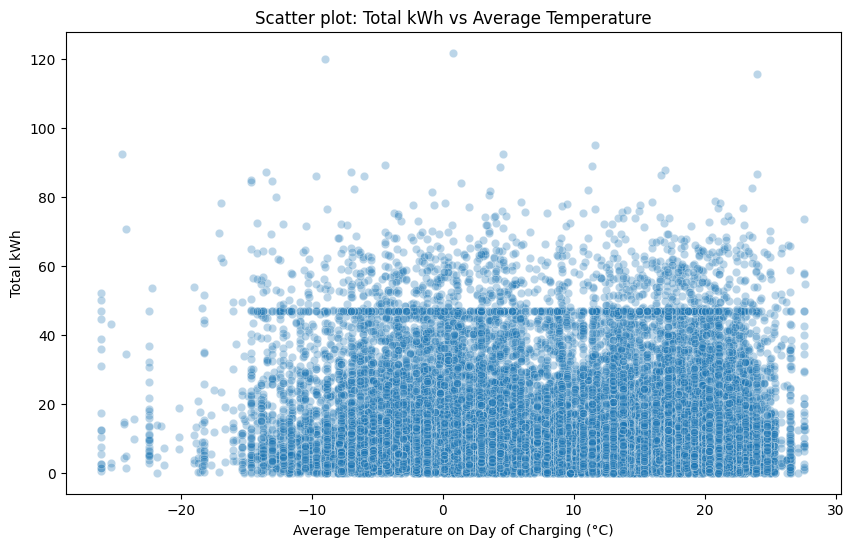

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='temperature_on_day', y='total_kwh', alpha=0.3)
plt.title('Scatter plot: Total kWh vs Average Temperature')
plt.xlabel('Average Temperature on Day of Charging (°C)')
plt.ylabel('Total kWh')
plt.show()

People charge roughly the same amount of energy (40-80 kWh) regardless of temperature, but they charge more frequently when it's cold or hot.

Temperature doesn't change how much you charge each time - it changes how often you need to charge. Cold and hot weather make you come back to charge more frequently, but you still put in about the same amount of energy each visit.



In [47]:
corr = df[['temperature_on_day', 'total_kwh']].corr().iloc[0,1]
print(f"Correlation between temperature_on_day and total_kwh: {corr:.3f}")

Correlation between temperature_on_day and total_kwh: -0.045


In [48]:
df.to_csv('/Users/ishaandawra/Desktop/Machine Learning Notes/Machine Learning Projects/EV-Project/data/cleaned_ev_dataset.csv',
          index=False)